In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

### 데이터 확인하기

In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived 0 사망 / 1 생존
- Pclass : 1등석, 2등석, 3등석
- sibsp : # of siblings (같이 탄 승객의 수)
- Parch : # of parents / children ( 같이 탄 부모, 아이 의 수)
- ticket : 티켓번호
- cabin : 좌석번호
- embarked : C = Cherbourg, Q=Queenstown, S=Southampton 

In [102]:
test.head() # Survived 가 없군

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
train.shape

(891, 12)

In [104]:
test.shape

(418, 11)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
test.info()
# age, cabin , fare 빠짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [107]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [109]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

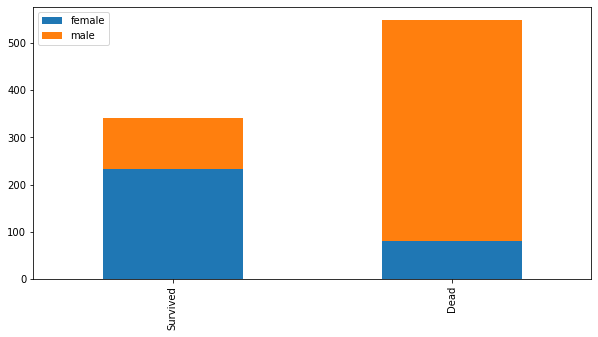

In [110]:
bar_chart('Sex')

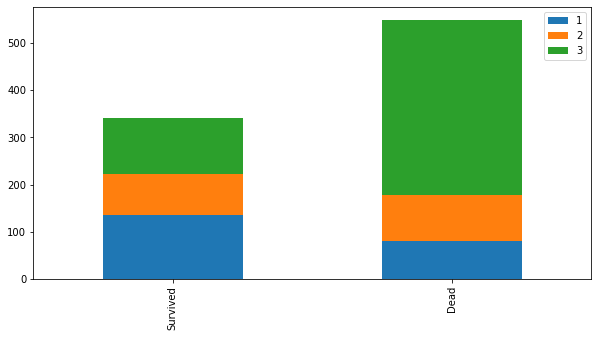

In [111]:
bar_chart('Pclass')
# Pclass 에 따라서 생존률이 변화

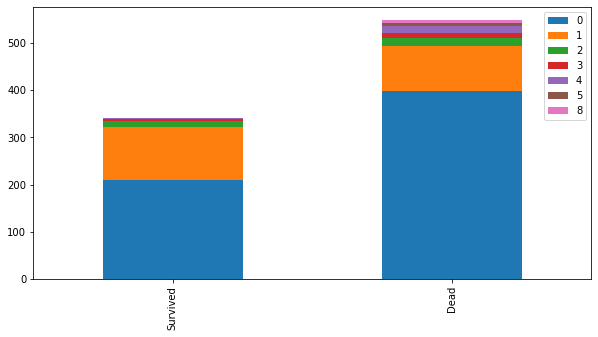

In [112]:
bar_chart('SibSp')
# 가족이 있으면 상대적으로 많이 생존

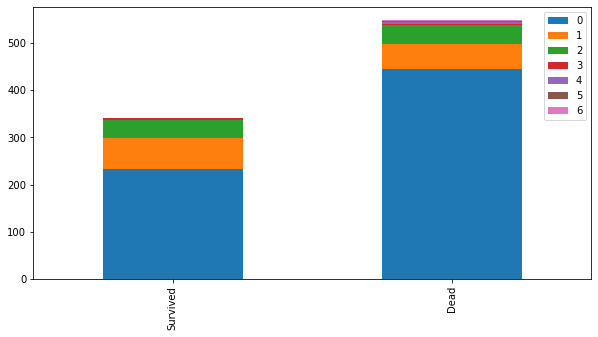

In [113]:
bar_chart('Parch')

# Feature engineering
*** 아주 중요 ***
- 각 속성의 숨은 의미에 대한 가설을 세우자

#### Name

In [114]:
train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [115]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Jonkheer      1
Countess      1
Mme           1
Don           1
Lady          1
Ms            1
Capt          1
Name: Title, dtype: int64

In [116]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [117]:
title_mapping={'Mr':0, 'Miss':1,'Mrs':2,
               'Master':3, 'Dr': 3,'Rev':3,'Col':3,'Major':3,'Mile':3,'Countess':3,
              'Ms':3, 'Lady':3, 'Jonkheer':3, 'Don':3, 'Dona':3, 'Mme':3, 'Capt':3, 'Sir':3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [118]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


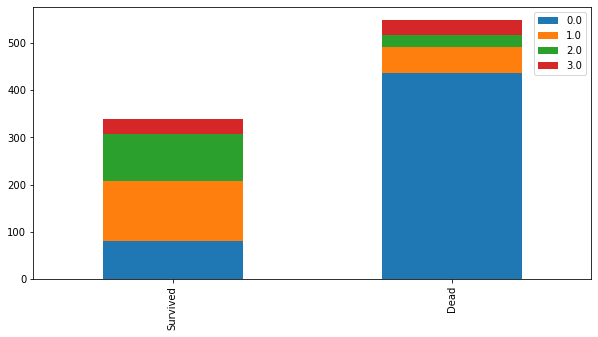

In [119]:
bar_chart('Title')

In [120]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [121]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


## Sex
- male : 0 , female : 1

In [122]:
sex_mapping= {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

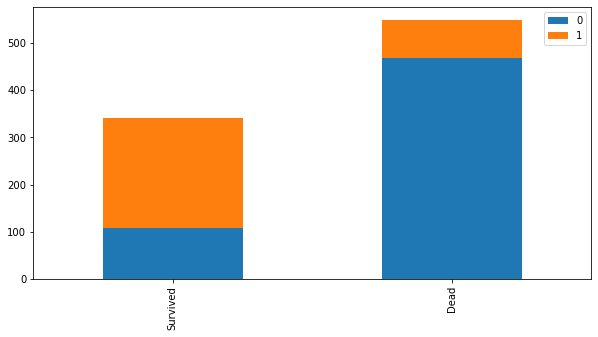

In [123]:
bar_chart('Sex')

## Age
- 각 Title 별 평균 대입

In [124]:
train['Age'].fillna(train.groupby("Title")['Age'].transform("median"),inplace=True)
test['Age'].fillna(train.groupby("Title")['Age'].transform("median"),inplace=True)

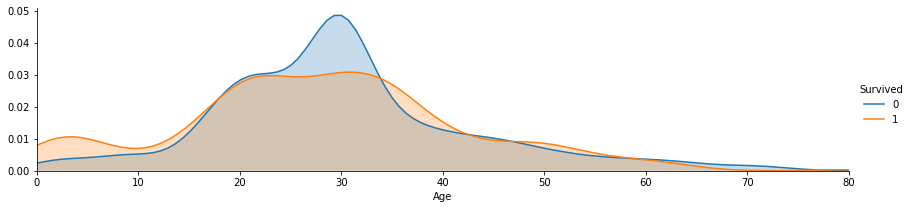

In [125]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

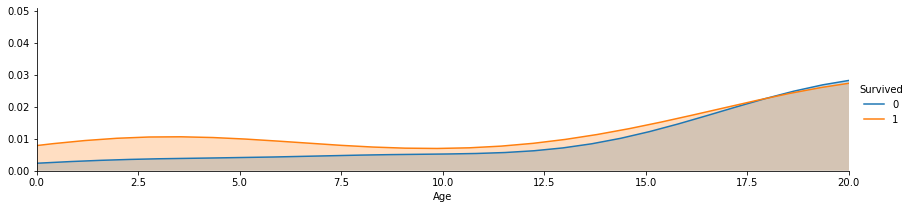

In [126]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
# 20살 까지만 본다


## Binning
- child : 0
- young : 1
- adult : 2
- mid-age : 3
- senior: 4

In [127]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26), 'Age']=1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age']=2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age']=3,
    dataset.loc[dataset['Age']>62, 'Age']=4

In [128]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


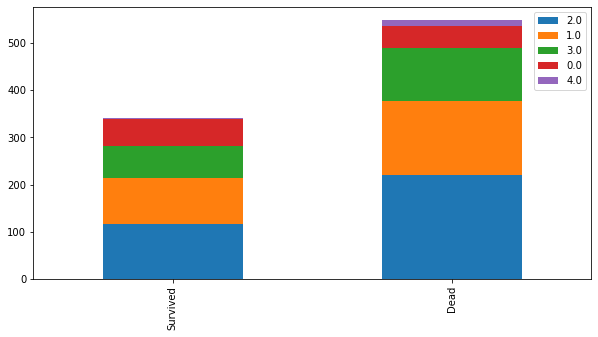

In [129]:
bar_chart('Age')

## Embarked
- NaN 값 채우기

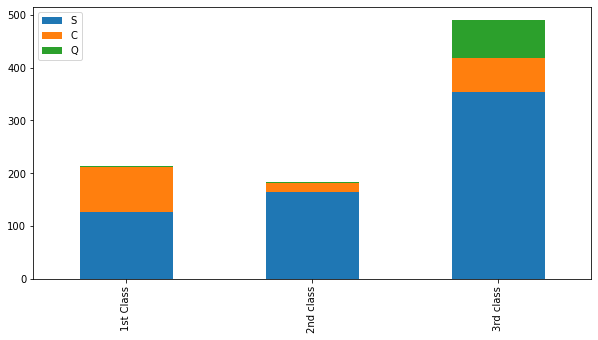

In [130]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st Class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [131]:
# 위 표를 보니 NaN 값을 S 로 채워도 될 것 같 군
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [132]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [133]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fare
- NaN 에 각 ㅎ클래스의 평균값을 넣어준다

In [134]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)

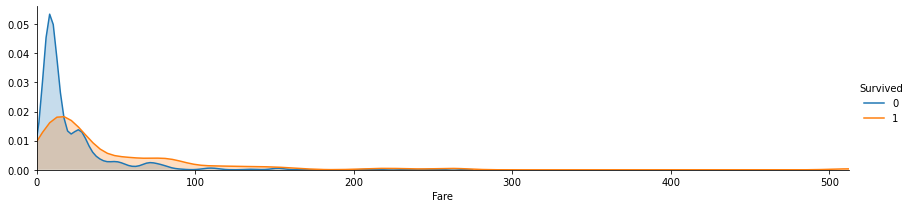

In [135]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

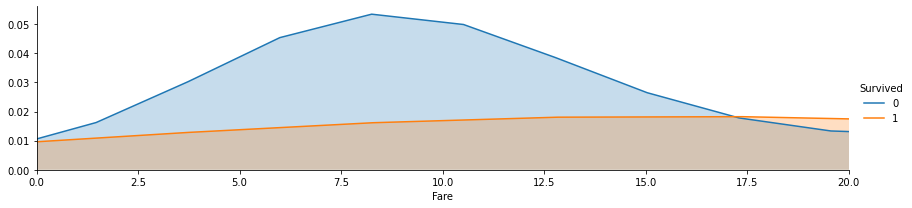

In [136]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)
# 20살 까지만 본다


In [137]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, 'Fare']=0,
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare']=1,
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100), 'Fare']=2,
    dataset.loc[dataset['Fare']>100, 'Fare']=3


In [138]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


## Cabin

In [139]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F2             3
              ..
E38            1
A16            1
A34            1
B101           1
D30            1
Name: Cabin, Length: 147, dtype: int64

In [140]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

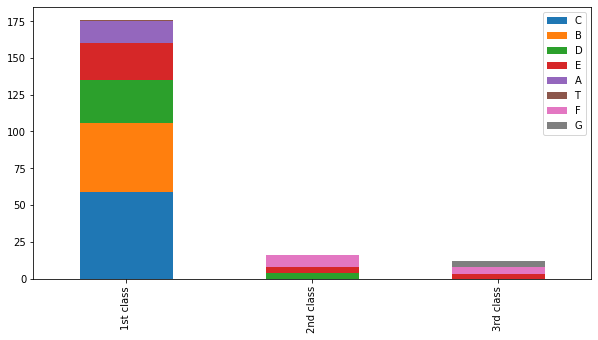

In [141]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [142]:
cabin_mapping={'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T':2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [143]:
# Pclass 별 Fare 의 NaN 값을 채운다
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

## FamilySize

In [144]:
train["FamilySize"] = train["SibSp"] + train["Parch"]+1
test["FamilySize"] = test["SibSp"] + test["Parch"]+1

(0.0, 11.0)

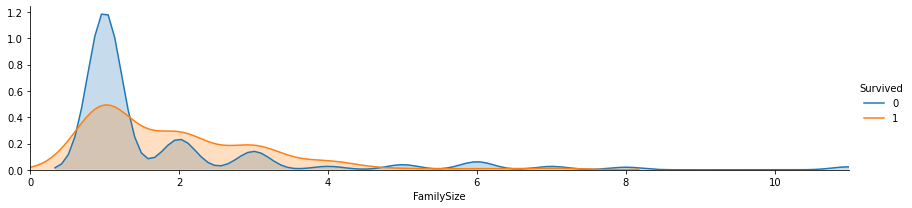

In [145]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [146]:
family_mapping={ 1:0,2:0.4, 3:0.8, 4:1.2, 5: 1.6, 6: 2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [147]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [148]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [152]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [153]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,2.0,2.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0
5,3,0,2.0,0.0,2.0,2,0.0,0.0
6,1,0,3.0,2.0,1.6,0,0.0,0.0
7,3,0,0.0,1.0,2.0,0,3.0,1.6
8,3,1,2.0,0.0,2.0,0,2.0,0.8
9,2,1,0.0,2.0,1.8,1,2.0,0.4


# Modeling

In [161]:

# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [166]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       889 non-null    float64
 8   FamilySize  891 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,1,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,1,2.0,2.0,0.8,0,2.0,0.4
4,0,3,0,2.0,0.0,2.0,0,0.0,0.0


#### Cross Validation (K-fold)

In [159]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### KNN 모델
- 비슷한 집군의 예측값을 설정하여 대상을 예측한다.

In [160]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "D:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "D:\Anaconda\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    

#### Decision Tree
- 각 조건에 따라 Yes/ No 로 구분지어 

In [163]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "D:\Anaconda\lib\site-packages\sklearn\base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "D:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 663, in check_array
    _assert_all_finite(array,
  File "D:\Anaconda\

In [165]:
#  random forest
# 조건을 주어지고 그 결과값의 확률에 따라 결정
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "D:\Anaconda\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "D:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63

In [156]:
# Naive Bayes
# 공식

In [ ]:
# SVM (support vector machine)


#### Cross Validation (K-fold)

In [158]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Testing

In [164]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()